### Basit Doğrusal Regresyon

In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
## Indexi değişken olarak aldı. Çözüm:
df = df.iloc[:,1:len(df)]

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe().T
# mean ile medyan arasında ciddi fark varsa dağılım çarpıktır diyebiliyoruz.

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.isnull().values.any()

False

In [10]:
df.corr()
# tv ve sales arasında pozitif ve güçlü bir ilişki var.

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


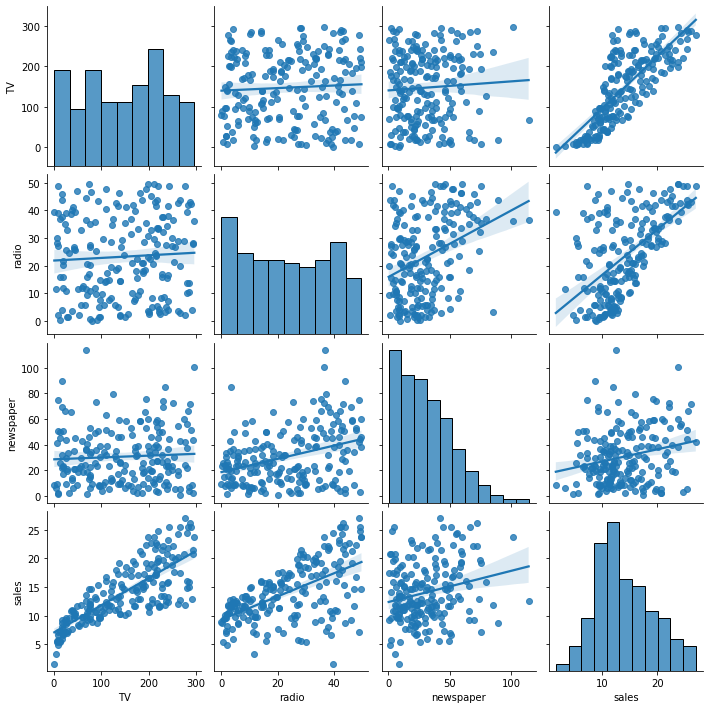

In [11]:
import seaborn as sns
sns.pairplot(df,kind="reg");

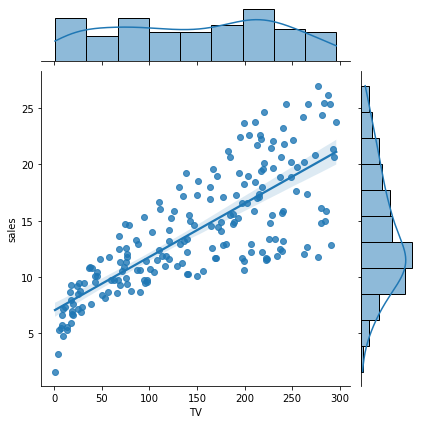

In [13]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg");
# tv dağılımı ikili yapıda gibi, salesler normal dağılım. Modele verileri sokarken, dağılımlarını bilmemiz, incelememiz gerekir. Sürekli değişkenin dağılımının iyi olması, merkezlerinin ne yönde olduğunu, yayılımını bilmemiz gerekir.
# Sadece tahmin başarısını bilmektense, dğeişkenleri tanımak önemlidir. Çünkü ileride değişken seçimi yapılabilir. 
# Sürekli değişkenin dağılımının iyi olması: o dağılımın tepeli olmaması, basit çarpıklık olmaması, gibi.


### Statsmodels ile modelleme

In [15]:
import statsmodels.api as sm

In [14]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
X = sm.add_constant(X)

C:\Users\Elif\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [18]:
y = df["sales"]

In [19]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [21]:
lm = sm.OLS(y,X) ## modeli initialize ettik.

In [22]:
model = lm.fit()

In [25]:
model.summary()

# Geniş çaplı çıktıyı, ve istatiksel testleri sckitlearn ile alamıyoruz.
# Bu sebeple bu tip doğrusal regresyon modelinde istatiksel anlamdaki detaylara erişmek için statsmodels kütüphanesiyle yapabiliriz.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        13:47:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model.params
# Bunlar Beta0 ve Beta1 değerleri.

const    7.032594
TV       0.047537
dtype: float64

In [28]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [29]:
# Katsayıların güven aralıkları:
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [31]:
# modelin anlamlılığına ilişkin istatiksel değerler:
model.f_pvalue

1.467389700194647e-42

In [32]:
print("f_pvalue: ", "%.3f" % model.f_pvalue)

f_pvalue:  0.000


In [35]:
print("fvalue: ", "%.4f" % model.fvalue)

fvalue:  312.1450


In [36]:
## hata kareleri ortalaması
model.mse_model

3314.618166868649

In [37]:
model.rsquared

0.611875050850071

In [39]:
## basit doğrusal çoklu regresyon modelin çıktılarına uygun modelin maetematiksel denklemini yazmak:

print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" +  str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


C:\Users\Elif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


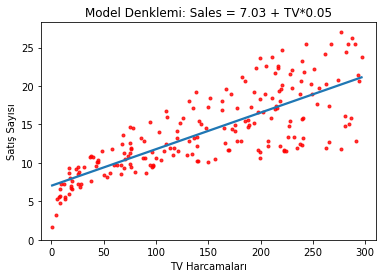

In [40]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [41]:
from sklearn.linear_model import LinearRegression

In [43]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_

array([0.04753664])

In [44]:
model.score(X,y)
# score: R2

0.611875050850071

In [45]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin

#### Model denklemi.
Sales = 7.03 + TV*0.04
##### Ornegin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [50]:
7.03 + 30*0.04

8.23

In [47]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)

In [48]:
model.predict([[30]])

array([8.45869276])

In [51]:
yeni_veri = [[5],[90],[200]]

In [52]:
model.predict(yeni_veri)
# her bir değer için tahmin değerini gerçekleştirdik.

array([ 7.27027675, 11.31089119, 16.53992164])

### Artıklar ve Makine Öğrenmesindeki Önemi

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [58]:
mse = mean_squared_error(y, model.fittedvalues)

In [62]:
mse
# birim başına düşen hata miktarı

10.512652915656757

In [60]:
import numpy as np
rmse = np.sqrt(mse)

In [61]:
rmse

3.2423221486546887

In [65]:
reg.predict(X)[0:10]
# tahmin edilen değerler.

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [66]:
y[0:10]
# gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [67]:
# karşılaştırma tablosu:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [68]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [69]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [70]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [71]:
# birim başına ne kadar hata?, ortalam hata miktarı:

k_t["hata_kare"] = k_t["hata"]**2

In [72]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [73]:
np.sum(k_t["hata_kare"])

92.90350329638102

In [75]:
np.mean(k_t["hata_kare"])

9.290350329638102

In [77]:
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996775

In [78]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

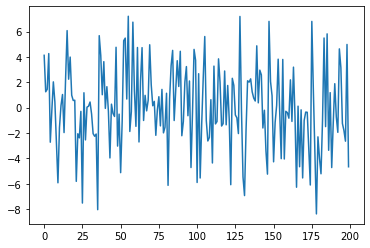

In [82]:
plt.plot(model.resid);
# gözlem değerleri, hatalar ayrıntısıyla incelenmelidir.

## Çoklu Doğrusal Regresyon

In [83]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [87]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [88]:
X = df.drop("sales",axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [89]:
X_train.shape

(160, 3)

In [90]:
y_train.shape

(160,)

In [91]:
X_test.shape

(40, 3)

In [92]:
y_test.shape

(40,)

In [93]:
training = df.copy()

In [94]:
training.shape

(200, 4)

### Statsmodels

In [95]:
lm = sm.OLS(y_train,X_train)

In [96]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                   1.28e-137
Time:                        19:04:00   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


### scikit-learn model

In [98]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [99]:
model.intercept_ # sabit katsayı

2.979067338122631

In [101]:
model.coef_ # diğer tüm katsayılar, tüm bağımsız değişkenlerin katsayıları

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

### Model denklemi:
 Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002


Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?


In [102]:
yeni_veri = [[30], [10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [106]:
model.predict(yeni_veri)
# bu değerleri verdiğimizde satışların eklenen değeri bu şekilde olucaktır.

array([6.32334798])

In [108]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
# eğitim hatasına erişme işlemidir.

In [107]:
rmse
# tahmin başarısıdır.

1.644727765644337

In [111]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
# test hatasına erişme işlemidir.

In [110]:
rmse

1.7815996615334508

### Model Tuning / Model Doğrulama

In [112]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [113]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [122]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

## random state değerini değiştirdiğimizde sonuçlar değşiyor. Modelin belirli kısmını seçicez ancak hangi belirli kısmı seçilmeli?
## Bu problem için 1.yöntem: Cross Validation yaparak model doğrulama yapmak.

1.6748559274650712

In [117]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701033

In [118]:
model.score(X_train, y_train)

0.8971614078663419

In [123]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

# modelin daha güvenilir valide edilmiş, doğrulanmış r2 değerini buluruz. O da budur.

0.8733783298422942

In [120]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.6649345607872932

In [121]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.7399924960346642